Enter Coordinate xMin : 100
Enter Coordinate yMin : 200
Enter Coordinate xMax : 500
Enter Coordinate yMax : 600
Enter Coordinate  x1 : 50
Enter Coordinate  y1 : 250
Enter Coordinate  x2 : 600
Enter Coordinate  y2 : 300


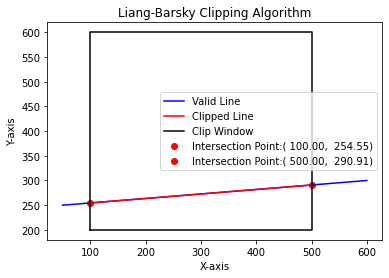

In [2]:
# Liang-Barsky Line Clipping algorithm
import matplotlib.pyplot as plt

def liangBarsky(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    # calculate differences
    dx = x2 - x1
    dy = y2 - y1
    # initialize p and q arrays
    p = [-dx, dx, -dy, dy]
    q = [x1 - xmin, xmax - x1, y1 - ymin, ymax - y1]
    # initialize u1 and u2
    u1 = 0
    u2 = 1
    # loop through all edges of the clip window
    for i in range(4):
        # handle parallel lines
        if p[i] == 0:
            if q[i] < 0:
                return None
        else:
            # calculate u value
            u = q[i] / p[i]
            # check u values and update u1 and u2
            if p[i] < 0 and u > u1:
                u1 = u
            elif p[i] > 0 and u < u2:
                u2 = u
            # handle invalid lines
            if u1 > u2:
                return None
            # calculate new coordinates of line
            new_x1 = x1 + u1 * dx
            new_y1 = y1 + u1 * dy
            new_x2 = x1 + u2 * dx
            new_y2 = y1 + u2 * dy

    # plot the valid and clipped lines
    plt.plot([x1, x2], [y1, y2], color='blue', label='Valid Line')
    plt.plot([new_x1, new_x2], [new_y1, new_y2],
             color='red', label='Clipped Line')
    # plot the clip window
    plt.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin],
             color='black', label='Clip Window')
    # plot the intersection points if exists
    if u1 > 0:
        plt.scatter(new_x1, new_y1, color='red',
                    label='Intersection Point:({: .2f}, {: .2f})'.format(new_x1, new_y1))
    if u2 < 1:
        plt.scatter(new_x2, new_y2, color='red',
                    label='Intersection Point:({: .2f}, {: .2f})'.format(new_x2, new_y2))
    # add labels and title to the plot
    plt.legend()
    plt.title('Liang-Barsky Clipping Algorithm')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    # show the plot
    plt.show()
    # return the new coordinates of the line
    return (new_x1, new_y1, new_x2, new_y2)


def main():
    # get user input for the clip window and line
    xMin = int(input("Enter Coordinate xMin : "))
    yMin = int(input("Enter Coordinate yMin : "))
    xMax = int(input("Enter Coordinate xMax : "))
    yMax = int(input("Enter Coordinate yMax : "))
    x1 = float(input("Enter Coordinate  x1 : "))
    y1 = float(input("Enter Coordinate  y1 : "))
    x2 = float(input("Enter Coordinate  x2 : "))
    y2 = float(input("Enter Coordinate  y2 : "))
    liangBarsky(x1, y1, x2, y2, xMin, yMin, xMax, yMax)
    plt.show()

if __name__ == "__main__":
    main()
